In [3]:
## Importing libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading datasets in Azure Workspace and converting into panda readable dataframes - from csv file
from azureml import Workspace

ws = Workspace(
    workspace_id='4167e2d2bf3842948998f3897d03c89d',
    authorization_token='Nlh02FCm1C0rEsOgVHz40X3qDXcBL494E4u2ULU4lNTxBvwf9IotS1x0+Q7dnk+6jRpvKV15JJmlQCmk90FPyQ==',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['breast-cancer-wisconsin.csv']
dataset1 = ds.to_dataframe()
ds = ws.datasets['wdbc.csv']
dataset2 = ds.to_dataframe()
ds = ws.datasets['wpbc.csv']
dataset3 = ds.to_dataframe()

In [4]:
## Preparing data for visualisation
## Dropping columns - not required for analysis
to_drop2 = [ 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31 ]
dataset2.drop(to_drop2, axis = 1, inplace = True, errors='ignore')
to_drop3 = [ 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32 ]
dataset3.drop(to_drop3, axis = 1, inplace = True,  errors='ignore')

## Assigning Header to columns
dataset1.columns = ['Code Number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
print(dataset1.head())

dataset2.columns = ['Code Number', 'Diagnosis', 'Mean Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension', 'Radius Standard Error', 'Worst Radius']
print(dataset2.head())

dataset3.columns = ['Code Number', 'Recurrence', 'Time (Recurrence/Disease free)', 'Mean Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension', 'Radius Standard Error', 'Worst Radius', 'Tumor Size', 'Lymph Node Status']
print(dataset3.head())

## Converting columns to have numeric values
col1 = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
dataset1[col1] = dataset1[col1].apply(pd.to_numeric, args = ('coerce',))
col2 = ['Mean Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension', 'Radius Standard Error', 'Worst Radius']
dataset2[col2] = dataset2[col2].apply(pd.to_numeric, args = ('coerce',))
col3 = ['Time (Recurrence/Disease free)', 'Mean Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension', 'Radius Standard Error', 'Worst Radius', 'Tumor Size', 'Lymph Node Status']
dataset3[col3] = dataset3[col3].apply(pd.to_numeric,args = ('coerce',))

## Removing rows with null values 
## dataset2 has no missing valus
dataset1.dropna(axis = 0, inplace = True)
dataset3.dropna(axis = 0, inplace = True)

## Categorizing columns
#dataset1['Class'] = ['Low' if i <= 2 else 'High' for i in dataset1['Class']]
dataset2['Diagnosis'] = ['Malignant' if i in ('M') else 'Benign' for i in dataset2['Diagnosis']]
dataset3['Recurrence'] = ['Recurrent' if i in ('R') else 'Non-recurrent' for i in dataset3['Recurrence']]





   Code Number  Clump Thickness  Uniformity of Cell Size  \
0      1000025                5                        1   
1      1002945                5                        4   
2      1015425                3                        1   
3      1016277                6                        8   
4      1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Epithelial Cell Size  \
0                         1                  1                     2   
1                         4                  5                     7   
2                         1                  1                     2   
3                         8                  1                     3   
4                         1                  3                     2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3                2        1      2  
2       

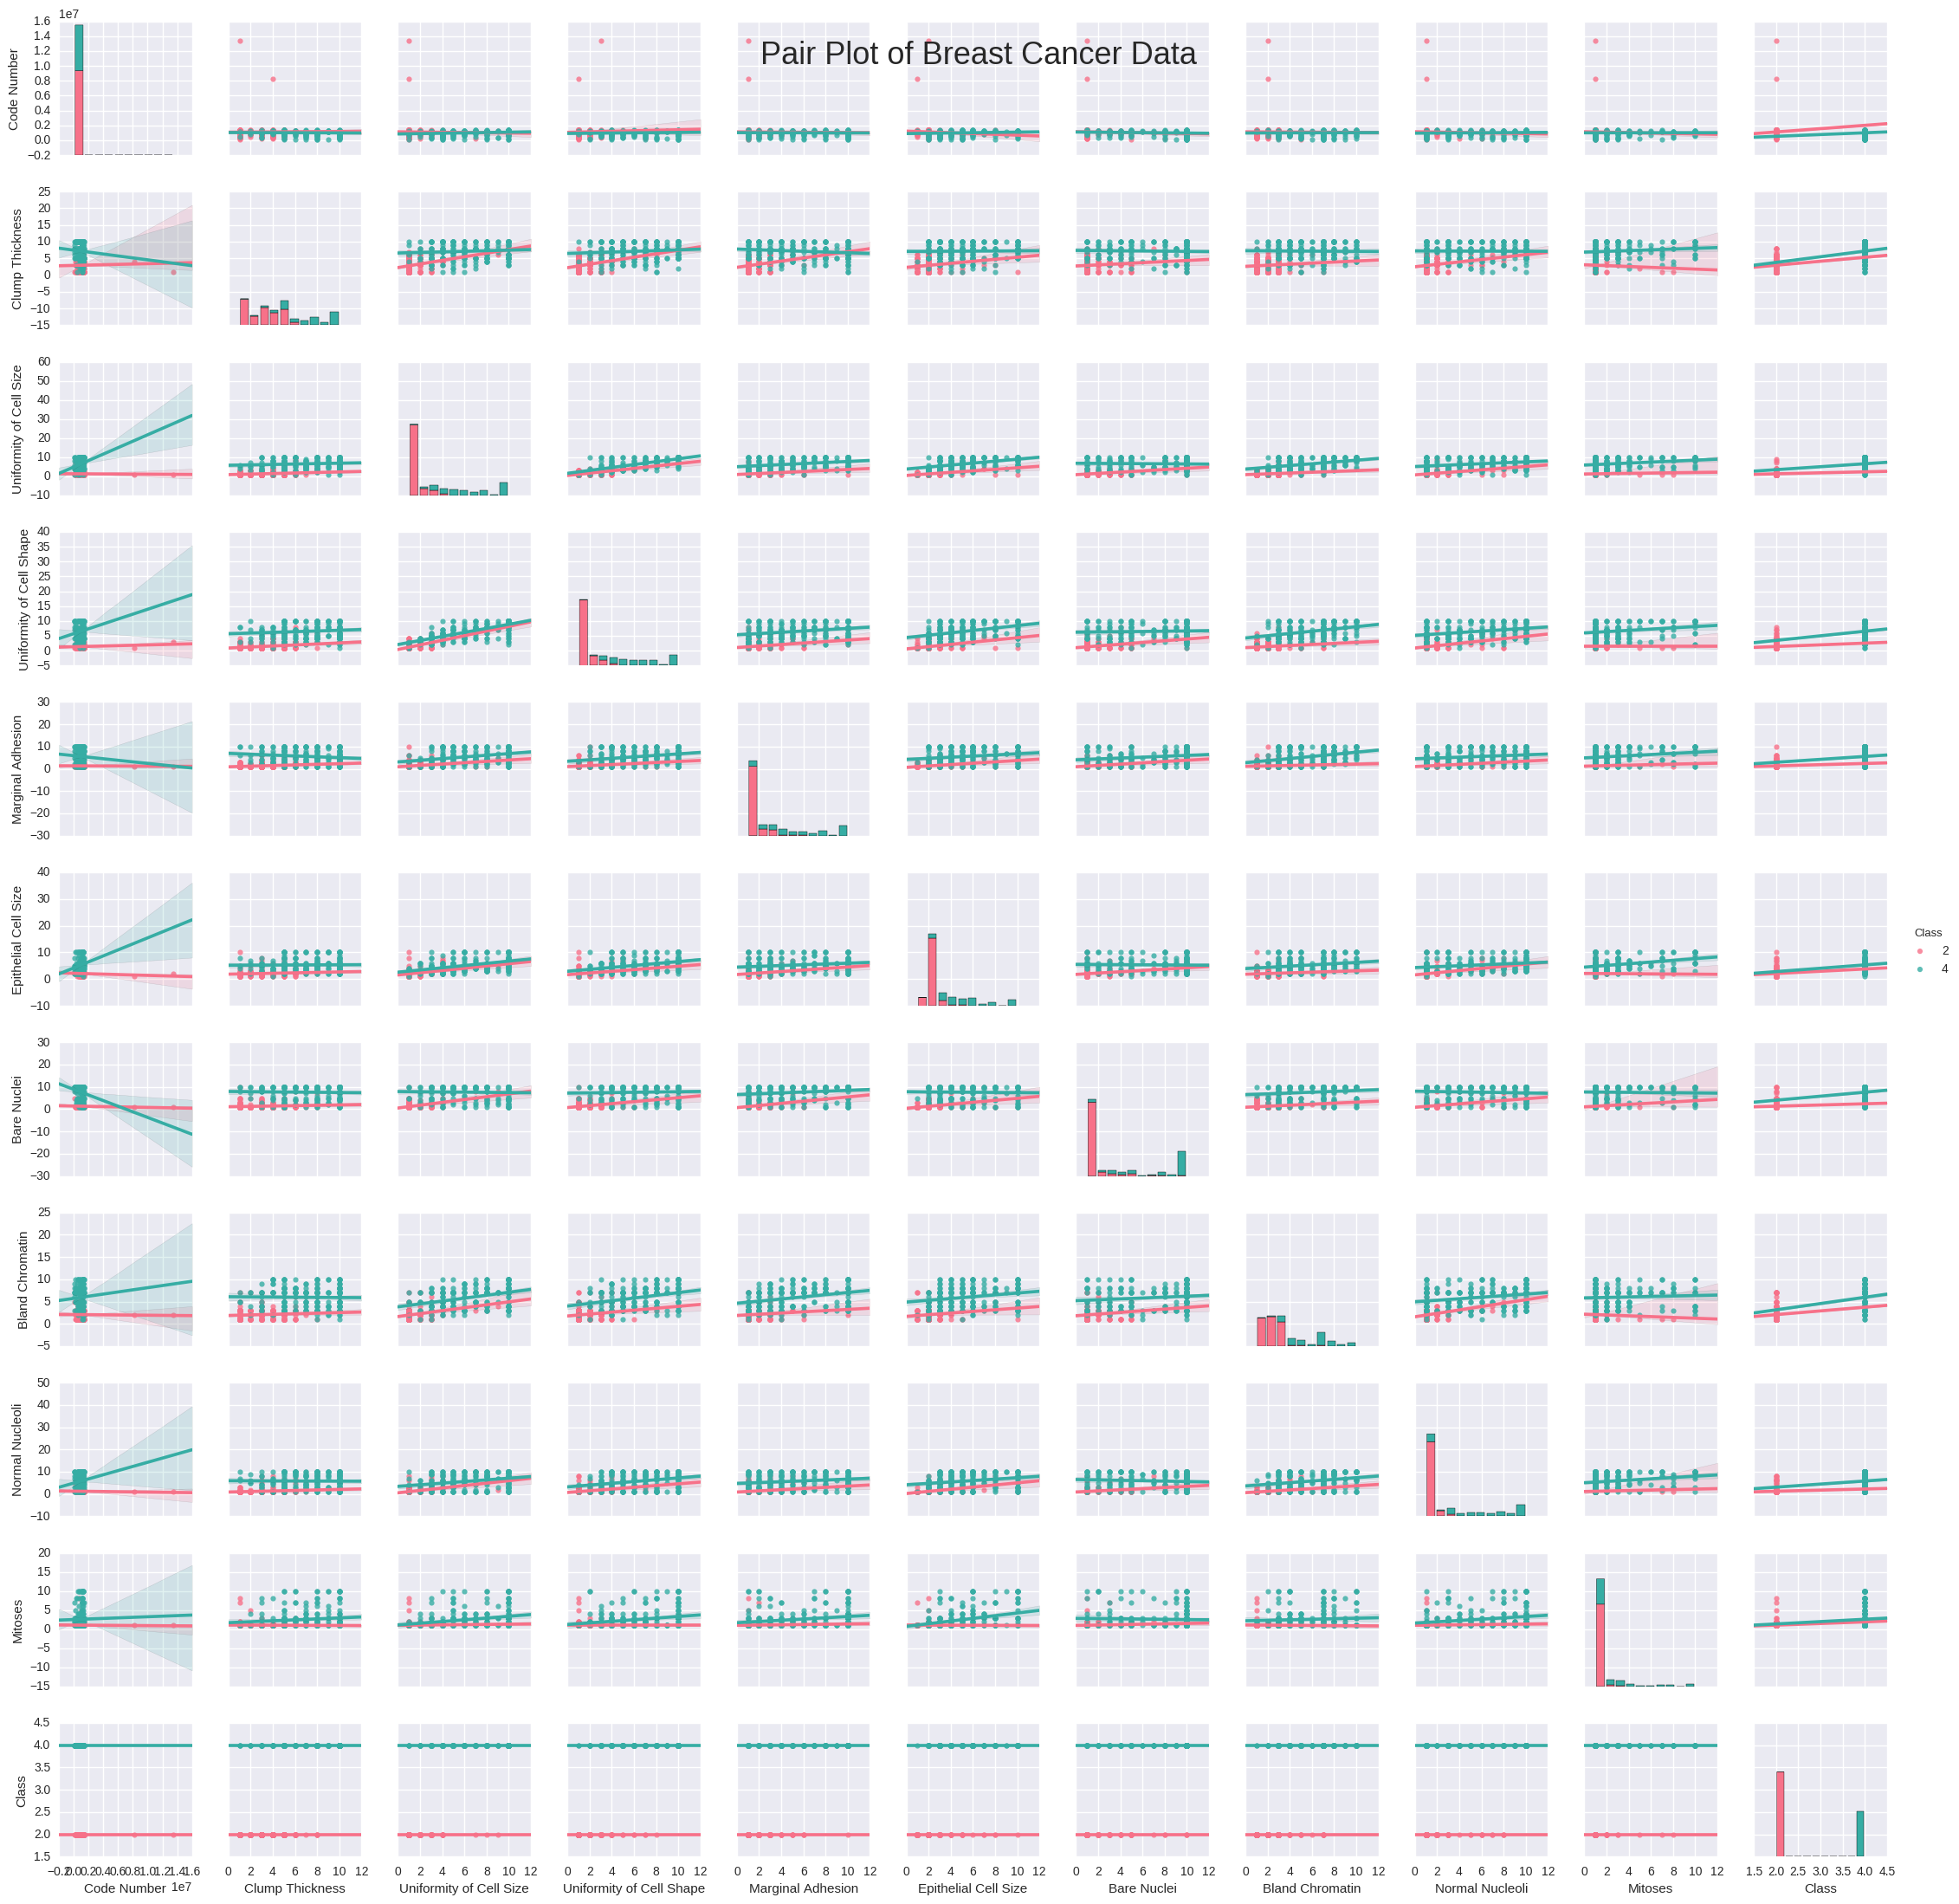

In [5]:
## Seaborn visualization library
import seaborn as sns

## Create the pairplot, hued on Class( value in 2,4) 
sns.pairplot(dataset1, hue = 'Class', palette='husl', kind = 'reg', size=2)

## Title 
plt.suptitle('Pair Plot of Breast Cancer Data', 
             size = 26);


## Visualization of the data shows aggressive cell structures for Class 4 (green) data as compared with Class 2 (red)


'Diagnosis'

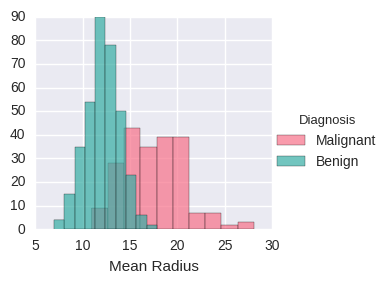

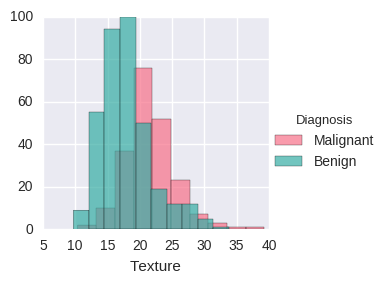

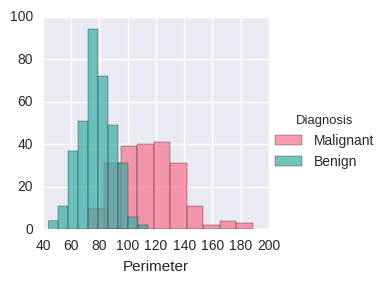

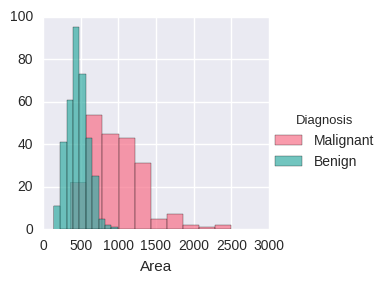

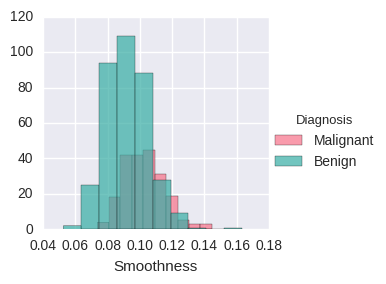

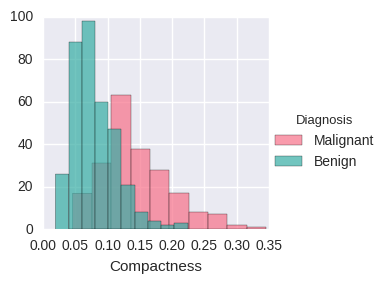

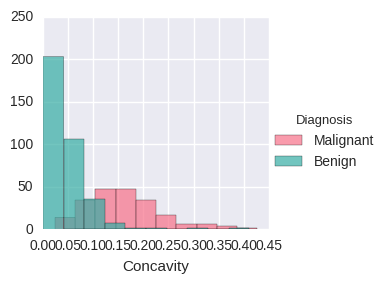

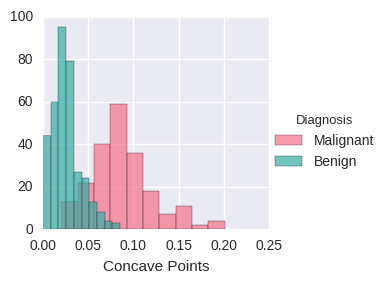

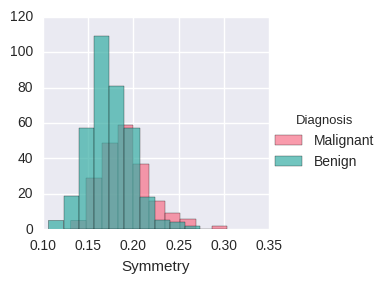

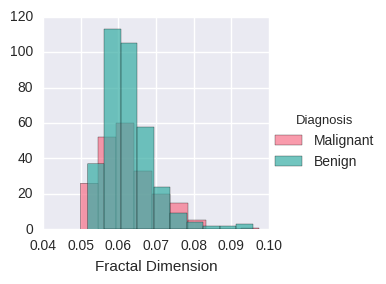

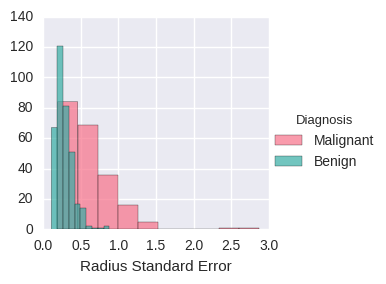

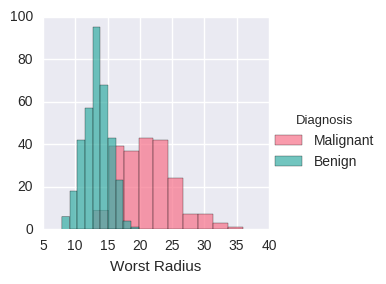

In [4]:
## Plotting histogram, doing PCA, to fimd out the features
## which predict the nature of tumor as Malignant or Benign

## Function 
def cond_hist(dataset2, plot_col, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Looping for all the columns
    for col in plot_col:
        grid1 = sns.FacetGrid(dataset2, hue=grid_col, palette='husl')
        grid1.map(plt.hist, col, alpha=.7).add_legend()
        
        #grid2 = sns.catplot(dataset2, hue=grid_col, palette='husl', kind='bar', col=col)
        #grid2.map(plt.hist, col, alpha=.7)
    return grid_col

## Defining features for conditioned histogram
plot_col = ['Mean Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension', 'Radius Standard Error', 'Worst Radius']

## Plotting histogram based on Diagnosis as Malignant or Benign 
cond_hist(dataset2, plot_col, 'Diagnosis')


## Below figures depict that Mean Radius, Perimeter, Area, Compactness, Concavity, 
## Concave Points, Radius Standard Error, Worst Radius can be good features to predict the nature of tumor

'Recurrence'

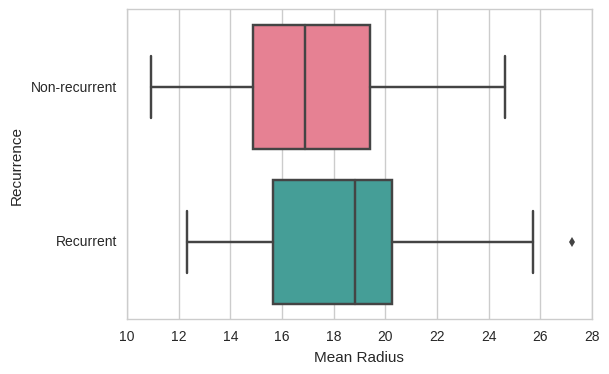

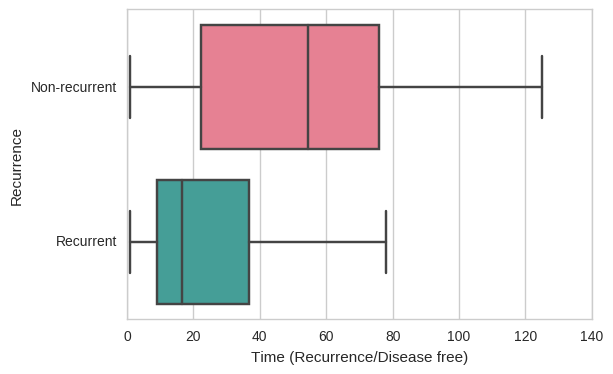

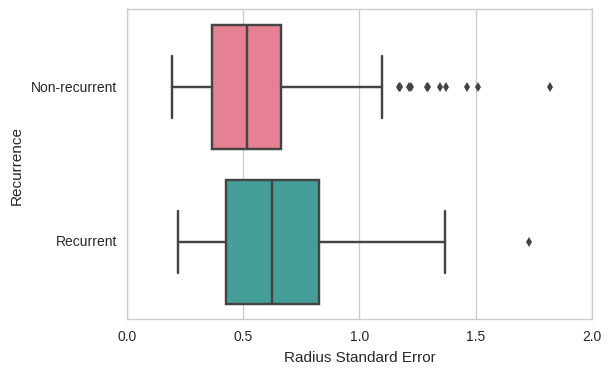

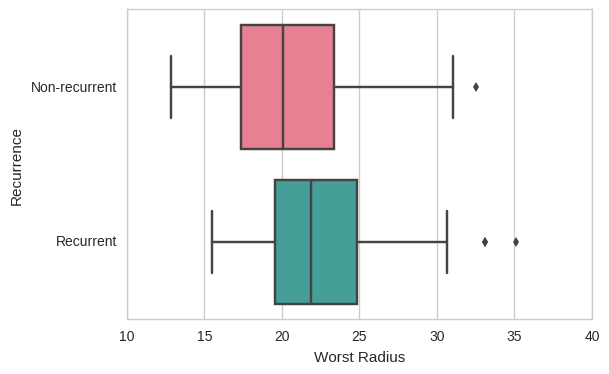

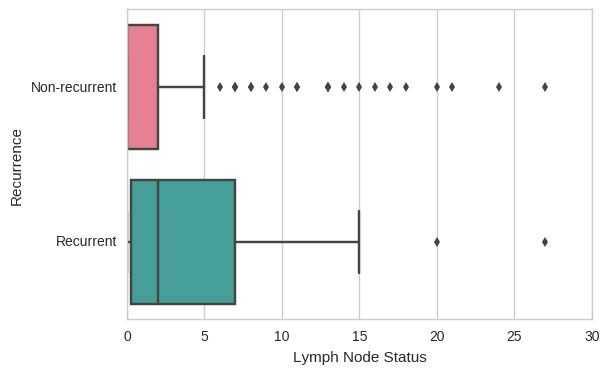

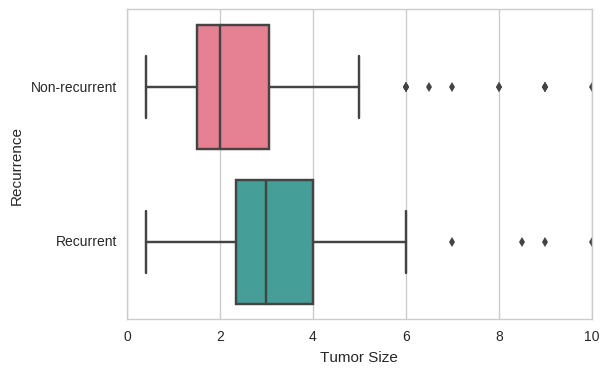

In [16]:
## Create Box plot; doing quantiative data analysis
def box_plot(dataset3, plot_cols, by):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in plot_cols:
        fig = plt.figure(figsize=(6,4))
        ax = fig.gca()
        ax = sns.boxplot(data=dataset3, x=col, y=by, palette='husl')
    return by

## Defining columns for box plot
plot_cols = ['Mean Radius','Time (Recurrence/Disease free)', 'Radius Standard Error', 'Worst Radius', 'Lymph Node Status', 'Tumor Size']

## Box Plotting data based on the recurrence 
box_plot(dataset3, plot_cols, 'Recurrence')   
